<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-Equipo_43_Carlos_Mendoza_and_Alan_Avelino/blob/main/Actividad_Semanal_4_Equipo_43.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Ciencia y Analítica de Datos**
###Tecnológico de Monterrey
###Prof Jobish Vallikavungal Devassia

## **Actividad de la Semana 4**
###**Principal Component Analysis (PCA)**

###Integrantes
* Carlos Daniel Mendoza Paz -- A01793027
* Alan Avelino Fernández Juárez -- A00989308


11 Octubre 2022

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [64]:
path = "/content/sample_data/Dataset.csv"

df = pd.read_csv(path)
df.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [65]:
#PASOS INICIALES:
#RENOMBRAR COLUMNAS DEL DATASET

In [66]:
df.rename(columns={'X1':'MONTO_CREDITO', 'X2':'GENERO', 'X3':'EDUCACION', 'X4':'ESTADO_CIVIL', 'X5':'EDAD', 'X6':'H_SEP','X7':'H_AGO','X8':'H_JUL','X9':'H_JUN','X10':'H_MAY','X11':'H_ABR','X12':'EC_SEP','X13':'EC_AGO','X14':'EC_JUL','X15':'EC_JUN', 'X16':'EC_MAY','X17':'EC_ABR','X18':'PA_SEP', 'X19':'PA_AGO','X20':'PA_JUL','X21':'PA_JUN','X22':'PA_MAY','X23':'PA_ABR'}, inplace = True)
df.head()

,ID,MONTO_CREDITO,GENERO,EDUCACION,ESTADO_CIVIL,EDAD,H_SEP,H_AGO,H_JUL,H_JUN,...,EC_JUN,EC_MAY,EC_ABR,PA_SEP,PA_AGO,PA_JUL,PA_JUN,PA_MAY,PA_ABR,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


##**PASO 1: Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos.**

In [90]:
df_2 = df.copy()

Determinamos los tipos de datos que tenemos.

In [68]:
df_2.dtypes

ID                 int64
MONTO_CREDITO      int64
GENERO           float64
EDUCACION        float64
ESTADO_CIVIL     float64
EDAD             float64
H_SEP            float64
H_AGO            float64
H_JUL            float64
H_JUN            float64
H_MAY            float64
H_ABR            float64
EC_SEP           float64
EC_AGO           float64
EC_JUL           float64
EC_JUN           float64
EC_MAY           float64
EC_ABR           float64
PA_SEP           float64
PA_AGO           float64
PA_JUL           float64
PA_JUN           float64
PA_MAY           float64
PA_ABR           float64
Y                float64
dtype: object

Relizamos una limpieza de los datos

In [69]:
df_2.isnull().any()

ID               False
MONTO_CREDITO    False
GENERO            True
EDUCACION         True
ESTADO_CIVIL      True
EDAD              True
H_SEP             True
H_AGO             True
H_JUL             True
H_JUN             True
H_MAY             True
H_ABR             True
EC_SEP            True
EC_AGO            True
EC_JUL            True
EC_JUN            True
EC_MAY            True
EC_ABR            True
PA_SEP            True
PA_AGO            True
PA_JUL            True
PA_JUN            True
PA_MAY            True
PA_ABR            True
Y                 True
dtype: bool

In [70]:
df_2.describe()

,ID,MONTO_CREDITO,GENERO,EDUCACION,ESTADO_CIVIL,EDAD,H_SEP,H_AGO,H_JUL,H_JUN,...,EC_JUN,EC_MAY,EC_ABR,PA_SEP,PA_AGO,PA_JUL,PA_JUN,PA_MAY,PA_ABR,Y
count,30000.000000,30000.000000,29999.000000,29998.000000,29998.000000,29995.000000,29997.000000,29995.000000,29993.000000,29991.000000,...,29985.000000,29983.000000,29990.000000,29992.000000,2.999100e+04,29992.000000,29989.000000,29989.000000,29995.000000,29997.000000
mean,15000.500000,167484.322667,1.603753,1.853057,1.551903,35.484214,-0.016635,-0.133689,-0.166405,-0.220800,...,43275.652326,40324.493980,38881.135745,5662.945886,5.922489e+03,5225.623400,4827.252526,4800.297209,5216.259977,0.221189
std,8660.398374,129747.661567,0.489125,0.790320,0.521968,9.218024,1.123829,1.197254,1.196048,1.169153,...,64345.500073,60809.984983,59561.312967,16564.165089,2.304418e+04,17608.422625,15668.751975,15280.842069,17778.848359,0.415054
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2329.000000,1763.500000,1256.250000,1000.000000,8.355000e+02,390.000000,296.000000,251.000000,118.000000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18107.000000,17081.000000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54560.000000,50213.000000,49208.250000,5006.000000,5.000000e+03,4505.500000,4014.000000,4033.000000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [71]:
df_2.dropna(inplace=True)
df_2.describe()

,ID,MONTO_CREDITO,GENERO,EDUCACION,ESTADO_CIVIL,EDAD,H_SEP,H_AGO,H_JUL,H_JUN,...,EC_JUN,EC_MAY,EC_ABR,PA_SEP,PA_AGO,PA_JUL,PA_JUN,PA_MAY,PA_ABR,Y
count,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,...,29958.000000,29958.000000,29958.000000,29958.000000,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000
mean,15005.550504,167555.900928,1.604012,1.853094,1.551739,35.483443,-0.017124,-0.134021,-0.166767,-0.221110,...,43279.335370,40328.984578,38889.925763,5664.614460,5.925715e+03,5228.429969,4829.873556,4801.481574,5220.708025,0.221143
std,8654.547473,129737.299088,0.489070,0.790471,0.521952,9.214319,1.123989,1.197171,1.196026,1.168419,...,64364.684347,60826.219326,59582.883301,16568.823518,2.305598e+04,17617.338167,15676.205514,15285.552652,17788.983767,0.415023
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7516.250000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2327.500000,1762.250000,1256.000000,1000.000000,8.352500e+02,390.000000,296.250000,253.250000,118.000000,0.000000
50%,15005.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19037.500000,18104.500000,17067.500000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22497.750000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54551.250000,50220.750000,49234.750000,5007.000000,5.000000e+03,4511.500000,4014.750000,4040.000000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [72]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29958 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             29958 non-null  int64  
 1   MONTO_CREDITO  29958 non-null  int64  
 2   GENERO         29958 non-null  float64
 3   EDUCACION      29958 non-null  float64
 4   ESTADO_CIVIL   29958 non-null  float64
 5   EDAD           29958 non-null  float64
 6   H_SEP          29958 non-null  float64
 7   H_AGO          29958 non-null  float64
 8   H_JUL          29958 non-null  float64
 9   H_JUN          29958 non-null  float64
 10  H_MAY          29958 non-null  float64
 11  H_ABR          29958 non-null  float64
 12  EC_SEP         29958 non-null  float64
 13  EC_AGO         29958 non-null  float64
 14  EC_JUL         29958 non-null  float64
 15  EC_JUN         29958 non-null  float64
 16  EC_MAY         29958 non-null  float64
 17  EC_ABR         29958 non-null  float64
 18  PA_SEP

Eliminamos las columnas que nos son necesarias para el análisis.

In [73]:
df_2 = df_2.drop(labels=['ID','GENERO','EDUCACION','ESTADO_CIVIL', 'H_SEP','H_AGO','H_JUL','H_JUN','H_MAY','H_ABR','Y'],axis=1)
df_2.head()

,MONTO_CREDITO,EDAD,EC_SEP,EC_AGO,EC_JUL,EC_JUN,EC_MAY,EC_ABR,PA_SEP,PA_AGO,PA_JUL,PA_JUN,PA_MAY,PA_ABR
0,20000,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


Utilice la proporción acumulada de la varianza que explican los componentes para determinar la cantidad de varianza que explican los componentes principales.

In [74]:
df_2.corr()

,MONTO_CREDITO,EDAD,EC_SEP,EC_AGO,EC_JUL,EC_JUN,EC_MAY,EC_ABR,PA_SEP,PA_AGO,PA_JUL,PA_JUN,PA_MAY,PA_ABR
MONTO_CREDITO,1.000000,0.144515,0.285616,0.278435,0.283373,0.294090,0.295625,0.290517,0.195026,0.178320,0.210052,0.203187,0.216990,0.219567
EDAD,0.144515,1.000000,0.056357,0.054469,0.053911,0.051528,0.049515,0.047810,0.025995,0.021820,0.029262,0.021338,0.022811,0.019533
EC_SEP,0.285616,0.056357,1.000000,0.951494,0.892272,0.860273,0.829781,0.802638,0.140276,0.099301,0.156856,0.158260,0.167010,0.179287
EC_AGO,0.278435,0.054469,0.951494,1.000000,0.928306,0.892456,0.859756,0.831570,0.280323,0.100770,0.150631,0.147338,0.157848,0.174180
EC_JUL,0.283373,0.053911,0.892272,0.928306,1.000000,0.923953,0.883893,0.853302,0.244291,0.316904,0.129933,0.143343,0.179617,0.182257
EC_JUN,0.294090,0.051528,0.860273,0.892456,0.923953,1.000000,0.940133,0.900931,0.232916,0.207498,0.299953,0.130124,0.160283,0.177562
EC_MAY,0.295625,0.049515,0.829781,0.859756,0.883893,0.940133,1.000000,0.946187,0.216967,0.181177,0.252229,0.293084,0.141421,0.164102
EC_ABR,0.290517,0.047810,0.802638,0.831570,0.853302,0.900931,0.946187,1.000000,0.199966,0.172615,0.233710,0.250218,0.307691,0.115415
PA_SEP,0.195026,0.025995,0.140276,0.280323,0.244291,0.232916,0.216967,0.199966,1.000000,0.285522,0.252063,0.199491,0.148102,0.185659
PA_AGO,0.178320,0.021820,0.099301,0.100770,0.316904,0.207498,0.181177,0.172615,0.285522,1.000000,0.244709,0.180043,0.180800,0.157563


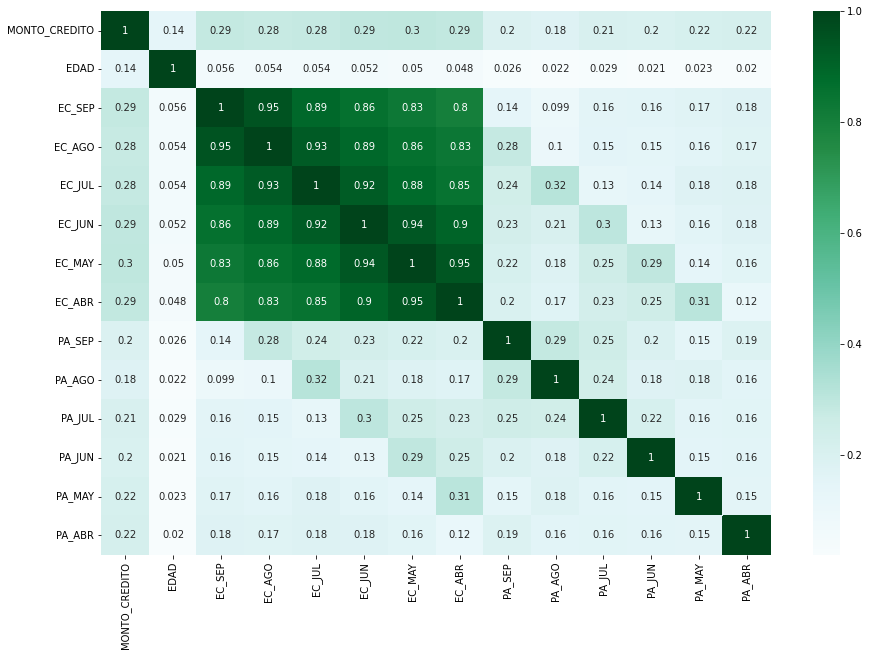

In [75]:
corrs = df_2.corr()
plt.figure(figsize=(15,10))
plt.title = "Varianza entre variables (Correlación)"
sns.heatmap(corrs, cmap = "BuGn", annot= True)
plt.show()

In [76]:
t = df_2.var().sum()

varMonto = df_2.MONTO_CREDITO.var()
var_Edad = df_2.EDAD.var()
var_eAbr = df_2.EC_ABR.var()
var_eMay = df_2.EC_MAY.var()
var_eJun = df_2.EC_JUN.var()
var_eJul = df_2.EC_JUL.var()
var_eAgo = df_2.EC_AGO.var()
var_eSep = df_2.EC_SEP.var()
var_pAbr = df_2.PA_ABR.var()
var_pMay = df_2.PA_MAY.var()
var_pJun = df_2.PA_JUN.var()
var_pJul = df_2.PA_JUL.var()
var_pAgo = df_2.PA_AGO.var()
var_pSep = df_2.PA_SEP.var()

print('Varianza Monto Crédito\t:', ((varMonto/t)*100).round(2),'%' )
print('Varianza Edad \t\t:', ((var_Edad/t)*100).round(2),'%' )
print('Varianza EC Abril \t:', ((var_eAbr/t)*100).round(2),'%' )
print('Varianza EC Mayo \t:', ((var_eMay/t)*100).round(2),'%' )
print('Varianza EC Junio \t:', ((var_eJun/t)*100).round(2),'%' )
print('Varianza EC Julio \t:', ((var_eJul/t)*100).round(2),'%' )
print('Varianza EC Agosto \t:', ((var_eAgo/t)*100).round(2),'%' )
print('Varianza EC Septiembre \t:', ((var_eSep/t)*100).round(2),'%' )
print('Varianza PA Abril \t:', ((var_pAbr/t)*100).round(2),'%' )
print('Varianza PA Mayo \t:', ((var_pMay/t)*100).round(2),'%' )
print('Varianza PA Junio \t:', ((var_pJun/t)*100).round(2),'%' )
print('Varianza PA Julio \t:', ((var_pJul/t)*100).round(2),'%' )
print('Varianza PA Agosto \t:', ((var_pAgo/t)*100).round(2),'%' )
print('Varianza PA Septiembre \t:', ((var_pSep/t)*100).round(2),'%' )

Varianza Monto Crédito	: 37.03 %
Varianza Edad 		: 0.0 %
Varianza EC Abril 	: 7.81 %
Varianza EC Mayo 	: 8.14 %
Varianza EC Junio 	: 9.12 %
Varianza EC Julio 	: 10.59 %
Varianza EC Agosto 	: 11.16 %
Varianza EC Septiembre 	: 11.94 %
Varianza PA Abril 	: 0.7 %
Varianza PA Mayo 	: 0.51 %
Varianza PA Junio 	: 0.54 %
Varianza PA Julio 	: 0.68 %
Varianza PA Agosto 	: 1.17 %
Varianza PA Septiembre 	: 0.6 %


##**Paso 2: Interprete cada componente principal en términos de las variables originales.**

Se escalan los datos.

In [77]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df_2)

df_scaled = pd.DataFrame(scaled, columns = df_2.columns)
df_scaled.head()

,MONTO_CREDITO,EDAD,EC_SEP,EC_AGO,EC_JUL,EC_JUN,EC_MAY,EC_ABR,PA_SEP,PA_AGO,PA_JUL,PA_JUN,PA_MAY,PA_ABR
0,-1.137363,-1.246282,-0.642497,-0.647359,-0.667925,-0.672419,-0.663031,-0.652714,-0.341890,-0.227134,-0.296782,-0.308107,-0.314124,-0.293485
1,-0.366561,-1.029224,-0.659205,-0.666697,-0.639201,-0.621583,-0.606229,-0.597982,-0.341890,-0.213645,-0.240019,-0.244315,-0.314124,-0.181054
2,-0.597802,-0.160996,-0.298738,-0.493940,-0.482436,-0.449762,-0.417277,-0.391745,-0.250270,-0.191958,-0.240019,-0.244315,-0.248702,-0.012407
3,-0.906122,0.164590,-0.057797,-0.013586,0.032552,-0.232512,-0.186929,-0.156808,-0.221179,-0.169448,-0.228667,-0.237936,-0.244188,-0.237269
4,-0.906122,2.335161,-0.578648,-0.611297,-0.161383,-0.347080,-0.348260,-0.331626,-0.221179,1.333962,0.270850,0.266021,-0.269048,-0.255314


Sacamos la varianza de los datos escalados.

In [78]:
t = df_scaled.var().sum()

varMonto = df_scaled.MONTO_CREDITO.var()
var_Edad = df_scaled.EDAD.var()
var_eAbr = df_scaled.EC_ABR.var()
var_eMay = df_scaled.EC_MAY.var()
var_eJun = df_scaled.EC_JUN.var()
var_eJul = df_scaled.EC_JUL.var()
var_eAgo = df_scaled.EC_AGO.var()
var_eSep = df_scaled.EC_SEP.var()
var_pAbr = df_scaled.PA_ABR.var()
var_pMay = df_scaled.PA_MAY.var()
var_pJun = df_scaled.PA_JUN.var()
var_pJul = df_scaled.PA_JUL.var()
var_pAgo = df_scaled.PA_AGO.var()
var_pSep = df_scaled.PA_SEP.var()

print('Varianza Monto Crédito\t:', ((varMonto/t)*100).round(2),'%' )
print('Varianza Edad \t\t:', ((var_Edad/t)*100).round(2),'%' )
print('Varianza EC Abril \t:', ((var_eAbr/t)*100).round(2),'%' )
print('Varianza EC Mayo \t:', ((var_eMay/t)*100).round(2),'%' )
print('Varianza EC Junio \t:', ((var_eJun/t)*100).round(2),'%' )
print('Varianza EC Julio \t:', ((var_eJul/t)*100).round(2),'%' )
print('Varianza EC Agosto \t:', ((var_eAgo/t)*100).round(2),'%' )
print('Varianza EC Septiembre \t:', ((var_eSep/t)*100).round(2),'%' )
print('Varianza PA Abril \t:', ((var_pAbr/t)*100).round(2),'%' )
print('Varianza PA Mayo \t:', ((var_pMay/t)*100).round(2),'%' )
print('Varianza PA Junio \t:', ((var_pJun/t)*100).round(2),'%' )
print('Varianza PA Julio \t:', ((var_pJul/t)*100).round(2),'%' )
print('Varianza PA Agosto \t:', ((var_pAgo/t)*100).round(2),'%' )
print('Varianza PA Septiembre \t:', ((var_pSep/t)*100).round(2),'%' )

Varianza Monto Crédito	: 7.14 %
Varianza Edad 		: 7.14 %
Varianza EC Abril 	: 7.14 %
Varianza EC Mayo 	: 7.14 %
Varianza EC Junio 	: 7.14 %
Varianza EC Julio 	: 7.14 %
Varianza EC Agosto 	: 7.14 %
Varianza EC Septiembre 	: 7.14 %
Varianza PA Abril 	: 7.14 %
Varianza PA Mayo 	: 7.14 %
Varianza PA Junio 	: 7.14 %
Varianza PA Julio 	: 7.14 %
Varianza PA Agosto 	: 7.14 %
Varianza PA Septiembre 	: 7.14 %


Aplicamos el PCA a los datos escalados previamente.

In [79]:
pcs = PCA()
pcs_t = pcs.fit_transform(df_scaled)
pcs_t

array([[-1.95861347e+00, -5.36935548e-01,  1.33026326e+00, ...,
        -3.14858410e-03,  8.15558569e-03,  9.86538923e-03],
       [-1.73543639e+00, -2.17455383e-01,  8.63894947e-01, ...,
         1.22574823e-02, -4.04768371e-03,  7.41830384e-04],
       [-1.22457257e+00, -2.85108665e-01,  2.13127766e-01, ...,
        -8.04550604e-02, -4.13466939e-02, -5.71189238e-02],
       ...,
       [-1.28525164e+00,  1.46260790e-01,  2.50362188e-01, ...,
         3.47276425e-02,  1.28749411e-02, -1.21264837e-02],
       [ 8.30126576e-01,  2.41954325e+00,  3.63918332e-01, ...,
         1.70414940e-01, -1.39937218e-01, -8.16447343e-03],
       [-5.17390297e-01, -6.00838232e-01, -7.49601106e-01, ...,
        -1.76099500e-02,  1.15296003e-01, -4.70445624e-02]])

Obtenemos las varianzas de los PCAs.

In [80]:
df_pcsSummary = pd.DataFrame({
  '% varianza explicada': np.round(pcs.explained_variance_ratio_,4) * 100,
  '% varianza acumulada': np.cumsum(pcs.explained_variance_ratio_) * 100
  })

df_pcsSummary

,% varianza explicada,% varianza acumulada
0,42.28,42.277891
1,12.26,54.533132
2,7.46,61.997411
3,6.61,68.605797
4,6.31,74.918180
5,6.23,81.152296
6,5.57,86.721112
7,5.19,91.911302
8,5.05,96.963631
9,1.89,98.852509


Etiquetamos los PCAs para un mejor entendimiento de los datos.

In [81]:
pcs_labels = [f'PC{i + 1}' for i in range(len(df_scaled.columns))]
df_pcsSummary.index = pcs_labels

df_pcsSummary

,% varianza explicada,% varianza acumulada
PC1,42.28,42.277891
PC2,12.26,54.533132
PC3,7.46,61.997411
PC4,6.61,68.605797
PC5,6.31,74.918180
PC6,6.23,81.152296
PC7,5.57,86.721112
PC8,5.19,91.911302
PC9,5.05,96.963631
PC10,1.89,98.852509


Realizamos los cálculos de las varianzas originales contra las varianzas de los componentes, para comprobar que el procedimiento del PCA no perdió información.

In [82]:
df_pcs = pd.DataFrame(pcs_t, columns = pcs_labels)

print("Varianza total variables originales: ", df_scaled.var().sum())
print("Varianza total de los componentes: ", df_pcs.var().sum())

Varianza total variables originales:  14.000467336515669
Varianza total de los componentes:  14.000467336515666


In [83]:
total_var = df_scaled.var().sum()
pd.DataFrame({
  "Porcentaje Varianza": (df_scaled.var()/ total_var) * 100,
  "Porcentaje Varianza Acumulado": (df_scaled.var().cumsum() / total_var) *100
})

,Porcentaje Varianza,Porcentaje Varianza Acumulado
MONTO_CREDITO,7.142857,7.142857
EDAD,7.142857,14.285714
EC_SEP,7.142857,21.428571
EC_AGO,7.142857,28.571429
EC_JUL,7.142857,35.714286
EC_JUN,7.142857,42.857143
EC_MAY,7.142857,50.000000
EC_ABR,7.142857,57.142857
PA_SEP,7.142857,64.285714
PA_AGO,7.142857,71.428571


Como se puede observar, sin el PCA ocuparíamos 12 variables, para estar arriba del 85% de la variación. En contraste, aplicando el PCA que solo necesitamos de 7 componentes.

In [84]:
df_comps = pd.DataFrame(
  pcs.components_.round(4), 
  columns = df_pcs.columns,
  index = df_scaled.columns) 


df_comps.iloc[:,:7]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
MONTO_CREDITO,0.1655,0.0328,0.3724,0.3833,0.3883,0.3916,0.3885
EDAD,0.3007,0.0719,-0.1908,-0.1746,-0.1269,-0.1204,-0.1059
EC_SEP,-0.3786,-0.8695,-0.0342,-0.0018,0.0347,0.0341,0.0339
EC_AGO,-0.2001,0.3390,-0.0639,0.0076,0.0605,0.0748,0.0396
EC_JUL,0.0353,-0.0398,0.0414,0.0832,0.1138,0.0284,-0.1068
EC_JUN,-0.0789,0.0715,-0.0440,-0.0288,0.0992,0.0145,-0.0993
EC_MAY,0.1112,-0.0788,0.0082,-0.0324,-0.1212,0.1265,-0.0076
EC_ABR,-0.0464,0.0274,0.0093,-0.1356,0.0931,0.0392,0.0498
PA_SEP,-0.8220,0.3303,0.0103,0.0169,-0.0186,0.0191,0.0237
PA_AGO,-0.0292,-0.0090,0.5667,0.3869,0.1229,-0.2053,-0.4200


In [85]:
df_comps.iloc[:,:7].abs().idxmax()

PC1    PA_SEP
PC2    EC_SEP
PC3    PA_AGO
PC4    PA_ABR
PC5    PA_ABR
PC6    PA_JUL
PC7    PA_MAY
dtype: object

##**Paso 3: Identifique valores atípicos.**

Gráfica BoxPlot del DataSet original.

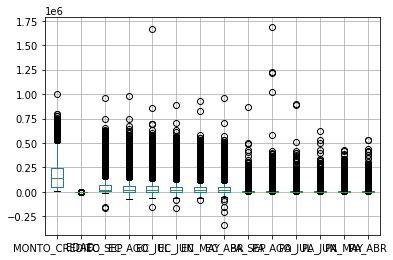

In [86]:
df_2.boxplot()

Gráfica BoxPlot del DataSet escalado.

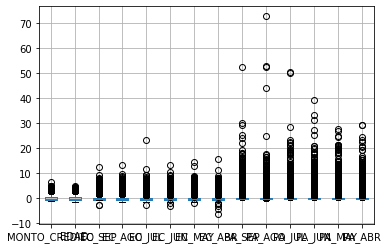

In [87]:
df_scaled.boxplot()

Gráfica BoxPlot del DataSet con PCA.

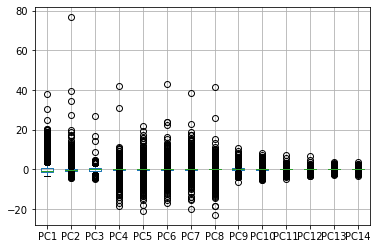

In [88]:
df_pca = pd.DataFrame(pcs_t, columns = df_pcs.columns)
df_pca.boxplot()

Gráfica BoxPlot del DataSet con las 7 variables finales con PCA.

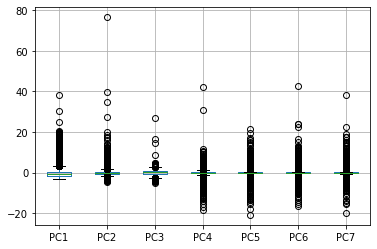

In [89]:
df_final = df_pca.iloc[:,:7]
df_final.boxplot()

##**Preguntas**

###**1.- ¿Cuál es el número de componentes mínimo y por qué?**

Para este ejercicio decidimos elegir un total de 7 componentes (PCAs)  dado el caso que nos da una variación arriba del 80%. Se podría incrementar este número con solo elegir mas componentes, sin embargo ya no estaríamos cumpliendo con el objetivo principal del PCA que trata de reducir el numero de variables.

Es importante recalcar que un componente no es una variable y que este esta compuesto por las diferentes variables del dataset.


###**2.- ¿Cuál es la variación de los datos que representan esos componentes?**

La variación acumulada de los siete componentes que elegimos es de 86.72%


###**3.- ¿Cuál es la pérdida de información después de realizar PCA?**
  
Con base en los cálculos realizados podemos decir que tenemos una perdida de alrededor del 13.28% del total de la información.


###**4.- De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?**

Se puede decir que las de mayor importancia serían las variables siguientes:
  * PC1: PA_SEP
  * PC2: EC_SEP
  * PC3: PA_AGO
  * PC4: PA_ABR
  * PC5: PA_ABR
  * PC6: PA_JUL
  * PC7: PA_MAY

Como se puede observar una de las variables se repite en uno de los componentes, esto podría parecer extraño, sin embargo es normal dado el caso de que si seguimos la lógica sobre que un componente contiene informacion de todas las variables, esto simplemente nos diría que la variable PA_ABR tiene mayor peso que las demas en dos de los 7 componentes.


###**5.- ¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?**

El uso de los PCA es una técnica bastante interesante que nos puede ayudar a reducir el número de variables a utilizar para nuestro modelo de machine learning haciendolo así menos complejo.

Por ejemplo, en este ejercicio teníamos un total de 14 variables y con la aplicación del PCA pudimos reducir a solo utilizar 7 componentes, que representan arriba del 85% de la varianza total de nuestras variables.